In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam,SGD
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.utils import plot_model
from keras import models
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

In [2]:
classes= os.listdir(r'..../garbage_classification')
classes

['paper',
 'green-glass',
 'clothes',
 'metal',
 'cardboard',
 'trash',
 'biological',
 'white-glass',
 'battery',
 'brown-glass',
 'plastic',
 'shoes']

In [3]:
len(classes)

12

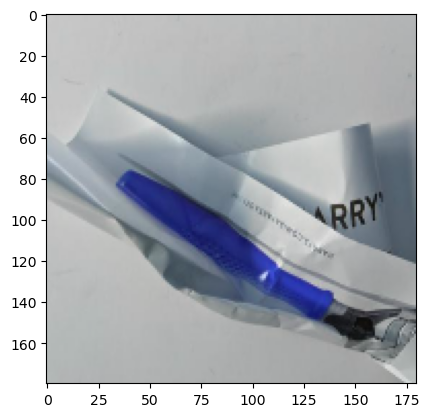

In [4]:
#let's print one of the images we have!
data_dir=r'...garbage_classification'
for category in classes:
    path=os.path.join(data_dir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.resize(img_array,(180,180))
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break  
    break

In [5]:
training_data= []
def create_training_data():
    for category in classes:
        path=os.path.join(data_dir,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            img_array=cv2.resize(img_array,(180,180))
            training_data.append([img_array,class_num])
create_training_data()

In [6]:
print(f'We have {len(training_data)} images.')

We have 15515 images.


In [7]:
X=[]
y=[]
for features, labels in training_data:
    X.append(features)
    y.append(labels)
X=np.array(X)/255
y=np.array(y)

In [8]:
print(np.shape(X))

(15515, 180, 180, 3)


In [9]:
y= keras.utils.to_categorical(y, num_classes=12)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [11]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(180,180,3), include_top=False,
    weights='imagenet', pooling=None,
    )

model = Sequential()
base_model.trainable=False
model.add(base_model)
model.add(GlobalAveragePooling2D())

model.add(Dense(units=12, activation='softmax')) 
model.summary()

2023-12-02 21:17:36.551787: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-02 21:17:36.552982: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-02 21:17:36.553031: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-02 21:17:36.553980: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-02 21:17:36.554673: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 6, 6, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 12)                15372     
                                                                 
Total params: 2273356 (8.67 MB)
Trainable params: 15372 (60.05 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [12]:
train_datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                         shear_range = 0.2,zoom_range = 0.2,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                        rotation_range=40,fill_mode='nearest')

In [13]:
opt= Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history=model.fit(x=train_datagen.flow(X_train,y_train,seed=27,
        shuffle=False),  
    steps_per_epoch=X_train.shape[0] // 32,
    validation_data=(X_test,y_test),
                  epochs=20,
    validation_steps=len(X_test)//32)

Epoch 1/20


2023-12-02 21:19:11.943062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


436/436 [==============================] - 208s 465ms/step - loss: 0.7012 - accuracy: 0.7805 - val_loss: 0.3863 - val_accuracy: 0.8711
Epoch 2/20
436/436 [==============================] - 200s 449ms/step - loss: 0.4412 - accuracy: 0.8571 - val_loss: 0.3567 - val_accuracy: 0.8814
Epoch 3/20
436/436 [==============================] - 188s 429ms/step - loss: 0.3913 - accuracy: 0.8723 - val_loss: 0.3247 - val_accuracy: 0.8969
Epoch 4/20
436/436 [==============================] - 195s 447ms/step - loss: 0.3787 - accuracy: 0.8787 - val_loss: 0.3233 - val_accuracy: 0.8911
Epoch 5/20
436/436 [==============================] - 183s 418ms/step - loss: 0.3440 - accuracy: 0.8872 - val_loss: 0.3220 - val_accuracy: 0.8892
Epoch 6/20
436/436 [==============================] - 181s 416ms/step - loss: 0.3394 - accuracy: 0.8869 - val_loss: 0.3154 - val_accuracy: 0.8950
Epoch 7/20
436/436 [==============================] - 186s 425ms/step - loss: 0.3258 - accuracy: 0.8925 - val_loss: 0.3102 - val_accura

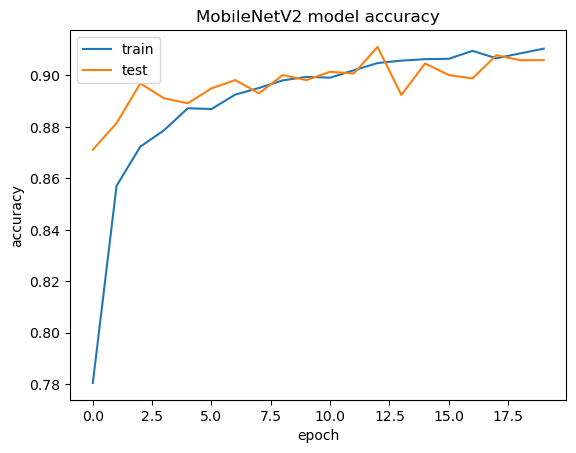

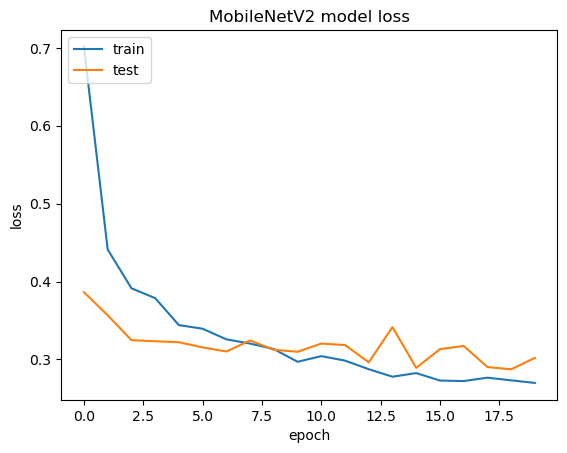

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV2 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV2 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save('.../trash/MobileNetV2')

INFO:tensorflow:Assets written to: /Users/mohsenboughriou/Downloads/trash/MobileNetV2/assets


INFO:tensorflow:Assets written to: /Users/mohsenboughriou/Downloads/trash/MobileNetV2/assets
